**Movie IMDB Statistical Analysis**
Required packages: Numpy, Pandas(?), Datascience, MXNet

In [53]:
import numpy as np
import math
import pandas as pan
from datascience import *
import mxnet as mx

# These lines do some fancy plotting magic
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)
from matplotlib import patches
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

datascience.__version__

'0.9.5'

color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
Color,Tara Subkoff,35,101,37,56,Balthazar Getty,501,nan,Drama|Horror|Mystery|Thriller,Timothy Hutton,#Horror,1547,1044,Lydia Hearst,1,bullying|cyberbullying|girl|internet|throat slitting,http://www.imdb.com/title/tt3526286/?ref_=fn_tt_tt_1,42,English,USA,Not Rated,1.5e+06,2015,418,3.3,nan,750
Color,Dan Trachtenberg,411,104,16,82,John Gallagher Jr.,14000,7.18972e+07,Drama|Horror|Mystery|Sci-Fi|Thriller,Bradley Cooper,10 Cloverfield Lane,126893,14504,Sumalee Montano,0,alien|bunker|car crash|kidnapping|minimal cast,http://www.imdb.com/title/tt1179933/?ref_=fn_tt_tt_1,440,English,USA,PG-13,1.5e+07,2016,338,7.3,2.35,33000
Color,Timothy Hines,1,111,0,247,Kelly LeBrock,1000,14616,Drama,Christopher Lambert,10 Days in a Madhouse,314,2059,Alexandra Callas,1,nan,http://www.imdb.com/title/tt3453052/?ref_=fn_tt_tt_1,10,English,USA,R,1.2e+07,2015,445,7.5,1.85,26000
Color,Gil Junger,133,97,19,835,Heath Ledger,23000,3.81761e+07,Comedy|Drama|Romance,Joseph Gordon-Levitt,10 Things I Hate About You,222099,37907,Andrew Keegan,6,dating|protective father|school|shrew|teen movie,http://www.imdb.com/title/tt0147800/?ref_=fn_tt_tt_1,549,English,USA,PG-13,1.6e+07,1999,13000,7.2,1.85,10000
nan,Christopher Barnard,nan,22,0,nan,nan,5,nan,Comedy,Mathew Buck,"10,000 B.C.",6,5,nan,0,nan,http://www.imdb.com/title/tt1869849/?ref_=fn_tt_tt_1,nan,nan,nan,nan,nan,nan,nan,7.2,nan,0


nan


/Users/arshzahed/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/Users/arshzahed/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/arshzahed/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:82: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)
/Users/arshzahed/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:94: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/arshzahed/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:116: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


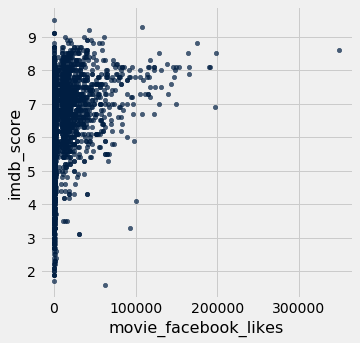

In [103]:
meta = Table().read_table('movie_metadata.csv')
meta.sort('movie_title').show(5)

def getR(table, col1, col2):
    table.scatter(col1, col2)
    table = table.where(col1, lambda x: isinstance(x, (int, float))).where(col2, lambda x: isinstance(x, (int, float)))
    stand1 = (table.column(col1)-np.mean(table.column(col1)))/np.std(table.column(col1))
    stand2 = (table.column(col2)-np.mean(table.column(col2)))/np.std(table.column(col2))
    r = np.mean(stand1*stand2)
    return r
#print(getR(meta.sort('budget').take(np.arange(meta.num_rows-1000)), 'budget', 'imdb_score'))
print(getR(meta, 'movie_facebook_likes', 'imdb_score'))


In [109]:
imdb = Table().read_table('imdb.csv')
def floatize(arr):
    new_arr = np.array([])
    suc, fail = 0, 0
    for i in arr:
        try:
            suc+=1
            new_arr = np.append(new_arr, float(i))
        except ValueError:
            fail+=1
            print(i)
            new_arr = np.append(new_arr, -1.0)
    print('successes: ', suc)
    print('fails: ', fail)
    return new_arr
imdb = imdb.with_column('imdb_score', floatize(imdb.column('imdbRating'))).where('imdb_score', lambda x: x!=-1)

dr seltsam oder wie ich lernte die bombe zu lieben
http://www.imdb.com/title/tt0086250/
http://www.imdb.com/title/tt0367110/
mary max oder schrumpfen schafe wenn es regnet
http://www.imdb.com/title/tt0080388/
http://www.imdb.com/title/tt0087884/
http://www.imdb.com/title/tt0319061/
http://www.imdb.com/title/tt0345561/
http://www.imdb.com/title/tt0049470/
eins zwei drei
http://www.imdb.com/title/tt0365376/
http://www.imdb.com/title/tt0433383/
http://www.imdb.com/title/tt0098360/
http://www.imdb.com/title/tt0083745/
http://www.imdb.com/title/tt0078841/
http://www.imdb.com/title/tt1137936/
http://www.imdb.com/title/tt0086837/
johnny guitar gejagt geha t gef rchtet
http://www.imdb.com/title/tt0052893/
 Spion (2011)
http://www.imdb.com/title/tt0038890/
http://www.imdb.com/title/tt0092593/
http://www.imdb.com/title/tt0595951/
http://www.imdb.com/title/tt0076538/
http://www.imdb.com/title/tt0080761/
http://www.imdb.com/title/tt0073341/
http://www.imdb.com/title/tt0043456/
deine meine unsere
h

We now have both datasets loaded. 

Lets start with the meta table to train a neural net in mxnet.

In [108]:
#type(imdb.column('imdb_score').item(0))
print(getR(imdb, 'duration', 'imdbRating'))

ValueError: The column 'imdbRating' contains non-numerical values. A plot cannot be drawn for this column.